In [1]:
import torch

from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
torch.__version__

'1.10.1'

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1050 Ti'

In [5]:
train_data = datasets.MNIST(root="mnist_data", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root="mnist_data", train=False, download=True, transform=ToTensor())

In [6]:
batch_size = 64
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [7]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
model = MyModel().to("cuda")

In [9]:
model

MyModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [11]:
n_epochs = 10
for epoch in range(n_epochs):
    print(f"Epoch {epoch+1} / {n_epochs}")
    train_size = len(train_dataloader.dataset)
    for batch, (X, y) in enumerate(train_dataloader):
        X = X.to("cuda")
        y = y.to("cuda")

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current_size = loss.item(), batch * batch_size
            print(f"- loss: {loss:>7f}  [{current_size:>5d}/{train_size:>5d}]")

Epoch 1 / 10
- loss: 2.288611  [    0/60000]
- loss: 0.329260  [ 6400/60000]
- loss: 0.248718  [12800/60000]
- loss: 0.310249  [19200/60000]
- loss: 0.237625  [25600/60000]
- loss: 0.277929  [32000/60000]
- loss: 0.153488  [38400/60000]
- loss: 0.256592  [44800/60000]
- loss: 0.251576  [51200/60000]
- loss: 0.200421  [57600/60000]
Epoch 2 / 10
- loss: 0.117504  [    0/60000]
- loss: 0.133978  [ 6400/60000]
- loss: 0.110983  [12800/60000]
- loss: 0.147869  [19200/60000]
- loss: 0.147116  [25600/60000]
- loss: 0.186856  [32000/60000]
- loss: 0.081399  [38400/60000]
- loss: 0.199057  [44800/60000]
- loss: 0.175143  [51200/60000]
- loss: 0.236885  [57600/60000]
Epoch 3 / 10
- loss: 0.055415  [    0/60000]
- loss: 0.089389  [ 6400/60000]
- loss: 0.147242  [12800/60000]
- loss: 0.174698  [19200/60000]
- loss: 0.125669  [25600/60000]
- loss: 0.100329  [32000/60000]
- loss: 0.053523  [38400/60000]
- loss: 0.184361  [44800/60000]
- loss: 0.144356  [51200/60000]
- loss: 0.175748  [57600/60000]
E

In [12]:
test_size = len(test_dataloader.dataset)
num_batches = len(test_dataloader)
model.eval()
test_loss, correct = 0, 0

with torch.no_grad():
    for X, y in test_dataloader:
        X = X.to("cuda")
        y = y.to("cuda")

        pred = model(X)
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

test_loss /= num_batches
correct /= test_size
print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Test Error: 
 Accuracy: 98.0%, Avg loss: 0.072547 



In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
img, label = test_data[0]

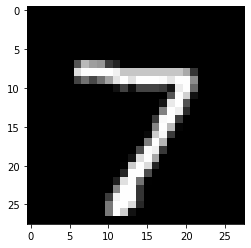

In [15]:
plt.imshow(img.squeeze(), cmap='gray')

In [16]:
label

7

In [17]:
logits = model(img.to("cuda"))

In [18]:
logits.argmax(1)

tensor([7], device='cuda:0')